**Project: Bank Clients' Churn prediction with Machine Learning**

**Market Understanding:**
**With the rapid rising demand for global financial services ,Machine learning(ML) is pivotal in bank churn studies as it enables financial institutions to predict and reduce customer attrition. By analyzing customer data, transaction histories, and behaviour patterns, ML algorithms can identify at-risk customers and provide insights into the factors driving churn. This predictive capability empowers banks to proactively implement retention strategies, personalized offers, and targeted interventions, ultimately preserving customer relationships, reducing revenue loss, and enhancing overall customer satisfaction and loyalty.**

**Objective:To develop a ML model that can competitively classify whether an individual is an existing client or has attrited . This is with the use of various inputs such as Education,Maritial Status, Income Status etc**


This dataset can also be found from:https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

**IMPORTING RELEVANT LIBRARIES**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score


**LOADING OF THE DATA**

In [2]:
bc_churn=pd.read_csv("/kaggle/input/credit-card-customers/BankChurners.csv")


**EXPLORATORY DATA ANAYLSIS**

In [3]:
bc_churn.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [4]:
bc_churn.tail()


CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
10122                0.857                  0.462   
10123                0.683                  0.511   
10124                0.818                  0.000   
10125                0.722                  0.000   
10126                0.649                  0.189   

       Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
10122                                           0.000191                                                                                    
10123                                           0.995270                                                                                    
10124                                           0.997880                                                                                    
10125                                           0.996710                                                                                    
10126                                           0.996620                                                                                    

       Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
10122                                           0.999810                                                                                   
10123                                           0.004729                                                                                   
10124                                           0.002118                                                                                   
10125                                           0.003294                                                                                   
10126                                           0.003377                                                                                   

[5 rows x 23 columns]

In [5]:
bc_churn=bc_churn.iloc[:,1:-2]
bc_churn


Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer            45      M                3   
1      Existing Customer            49      F                5   
2      Existing Customer            51      M                3   
3      Existing Customer            40      F                4   
4      Existing Customer            40      M                3   
...                  ...           ...    ...              ...   
10122  Existing Customer            50      M                2   
10123  Attrited Customer            41      M                2   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0

In [6]:
bc_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [7]:
bc_churn.describe().style.background_gradient(cmap = 'copper')

In [8]:
bc_churn.shape

(10127, 20)

In [9]:
bc_churn.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [10]:

bc_churn['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

**DATA VISUALISATION**

<Axes: xlabel='Attrition_Flag', ylabel='count'>

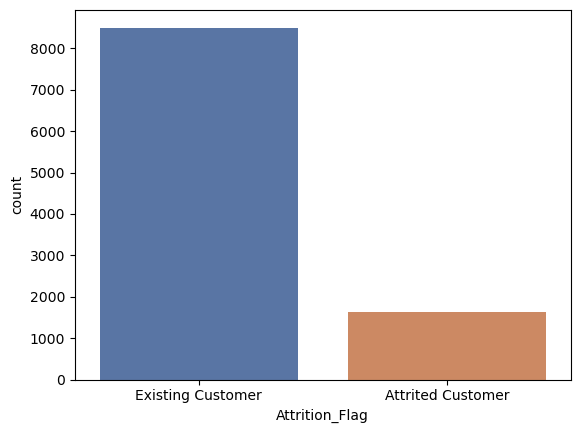

In [11]:
#data distribution plot
sns.countplot(data=bc_churn, x='Attrition_Flag', palette='deep')

<Axes: >

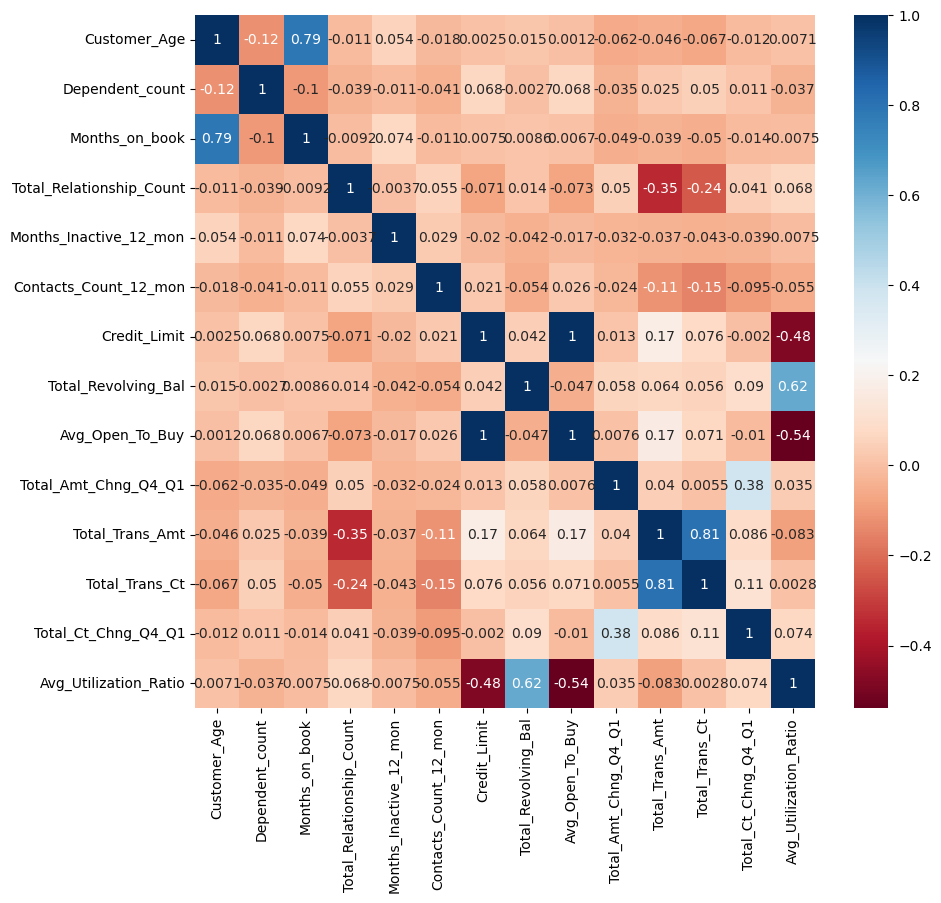

In [12]:
#lets visualise  correlations between numericals variables
plt.figure(figsize=(10,9))
sns.heatmap(bc_churn.corr(), cmap="RdBu",annot=True)

In [13]:
#removing variables with extreme multicollinearity
bc_churn=bc_churn.drop("Avg_Open_To_Buy",axis=1)

In [14]:
#labelencoding for our target variable
encoder=LabelEncoder()
bc_churn['Attrition_Flag']=encoder.fit_transform(bc_churn['Attrition_Flag'])
bc_churn['Attrition_Flag'].unique()

array([1, 0])

In [15]:
X=bc_churn.drop('Attrition_Flag', axis=1)
y=bc_churn["Attrition_Flag"]

In [16]:
#the categorical columns in the data
cat_cols=bc_churn.select_dtypes(include='object')
cat_cols_names=cat_cols.columns.tolist() 
print(cat_cols_names) 


['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


In [17]:
cat_cols_names=["Gender" ,"Education_Level" ,"Marital_Status" ,"Income_Category" ,"Card_Category" ] 
bc_churn=bc_churn[cat_cols_names]

In [18]:
#the numerical data columns
num_cols=X.select_dtypes(include=['int64','float64'])
num_cols_names=num_cols.columns.tolist()
print(num_cols_names) 

['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


In [19]:
#hot encoding the data
X=pd.get_dummies(X, columns=cat_cols_names)
X

Customer_Age  Dependent_count  Months_on_book  \
0                45                3              39   
1                49                5              44   
2                51                3              36   
3                40                4              34   
4                40                3              21   
...             ...              ...             ...   
10122            50                2              40   
10123            41                2              25   
10124            44                1              36   
10125            30                2              36   
10126            43                2              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  ...  Income_Category_$120K +  \
0                     1.335             1144  ...                        0   
1                     1.541             1291  ...                        0   
2                     2.594             1887  ...                        0   
3                     1.405             1171  ...                        0   
4                     2.175              816  ...                        0   
...                     ...              ...  ...                      ...   
10122                 0.703            15476  ...                        0   
10123                 0.804             8764  ...                        0   
10124                 0.819            10291  ...                        0   
10125                 0.535             8395  ...                        0   
10126                 0.703            10294  ...                        0   

       Income_Category_$40K - $60K  Income_Category_$60K - $80K  \
0                                0                            1   
1                                0                            0   
2                                0                            0   
3                                0                            0   
4                                0                            1   
...                            ...                          ...   
10122                            1                            0   
10123                            1                            0   
10124                            0                            0   
10125                            1                            0   
10126                            0                            0   

       Income_Category_$80K - $120K  Income_Category_Less than $40K  \
0      

In [20]:
X

Customer_Age  Dependent_count  Months_on_book  \
0                45                3              39   
1                49                5              44   
2                51                3              36   
3                40                4              34   
4                40                3              21   
...             ...              ...             ...   
10122            50                2              40   
10123            41                2              25   
10124            44                1              36   
10125            30                2              36   
10126            43                2              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  ...  Income_Category_$120K +  \
0                     1.335             1144  ...                        0   
1                     1.541             1291  ...                        0   
2                     2.594             1887  ...                        0   
3                     1.405             1171  ...                        0   
4                     2.175              816  ...                        0   
...                     ...              ...  ...                      ...   
10122                 0.703            15476  ...                        0   
10123                 0.804             8764  ...                        0   
10124                 0.819            10291  ...                        0   
10125                 0.535             8395  ...                        0   
10126                 0.703            10294  ...                        0   

       Income_Category_$40K - $60K  Income_Category_$60K - $80K  \
0                                0                            1   
1                                0                            0   
2                                0                            0   
3                                0                            0   
4                                0                            1   
...                            ...                          ...   
10122                            1                            0   
10123                            1                            0   
10124                            0                            0   
10125                            1                            0   
10126                            0                            0   

       Income_Category_$80K - $120K  Income_Category_Less than $40K  \
0      

In [21]:
#standardising  the the naturally numerical columns(excluded are  the label encoded and hot encoded columns) 
scaler=StandardScaler()
X[num_cols_names]=scaler.fit_transform(X[num_cols_names])


**splitting of the data**

In [22]:
 X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.33, random_state=42)


**Fitting and training of the models**

In [23]:
#AdaBoostClassifier 
abc=AdaBoostClassifier(n_estimators=50) 
abc.fit(X_train,y_train) 
abc_preds=abc.predict(X_test)

accuracy=accuracy_score(y_test, abc_preds) 
print(accuracy) 

0.9536205864751646


In [24]:
#cross validation score 
score=cross_val_score(abc, X, y, cv=7, scoring="accuracy"). mean() 
print(score)

0.9322606290334629


In [25]:
#RandomForestClasifier
rfc=RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train,y_train) 
rfc_preds=rfc.predict(X_test)

accuracy=accuracy_score(y_test, rfc_preds) 
print(accuracy) 


0.9545182525433872


In [26]:
#cross validation score 
score=cross_val_score(rfc, X, y, cv=7, scoring="accuracy"). mean() 
print(score)

0.93225632767452


**Plotting of the ROC Curves**

In [27]:
#AdaBoostClassifier

abc_probs = abc.predict_proba(X_test)[:, 1]
# calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_test, abc_probs)
# calculating AUC
roc_auc = roc_auc_score(y_test, abc_probs)

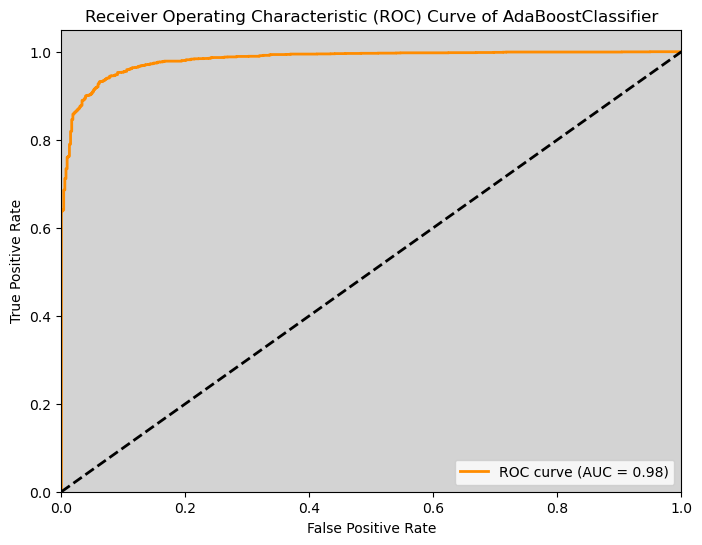

In [28]:
#plotting
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor('lightgray')  

plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of AdaBoostClassifier')
plt.legend(loc='lower right')
plt.show()


In [29]:
#RandomForestClassifier

rfc_probs = rfc.predict_proba(X_test)[:, 1]
#calculating ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rfc_probs)
#calculating AUC
roc_auc = roc_auc_score(y_test, rfc_probs)

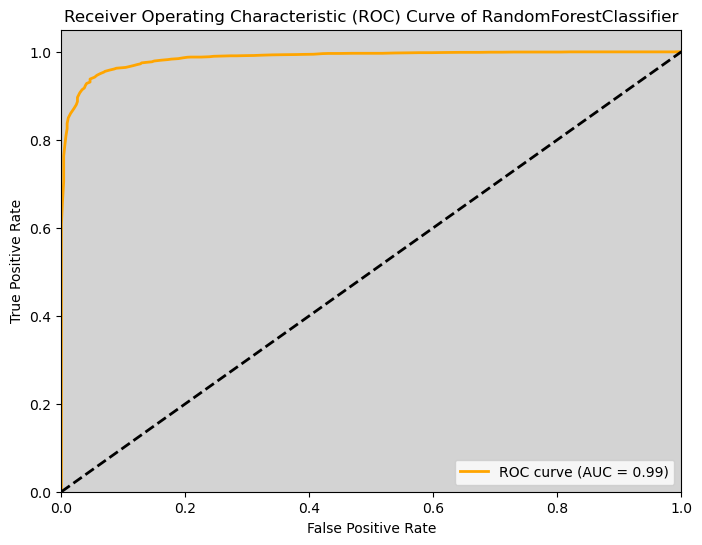

In [30]:
#plotting
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_facecolor('lightgray')  # Set the background color to grey


plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of RandomForestClassifier')
plt.legend(loc='lower right')
plt.show()

**The RandomForestClassifier and the AdaBoostClassifier both perfomed equally well with microscopic differences in their cross validation scores and AUC . AdaBoostClassifier would be more favourable to be deployed  as it performs  well on imbalanced data in the long run.**